# Pré-processamento dos dados das exportações do RN
## Etapa 2 - Análise de outliers

<img height="200" src="https://share-eric.eu/fileadmin/_processed_/b/5/csm_dataheader_ec9ee966be.jpg" width="600"/>

# Carregando base de dados das exportações do RN após etapa 1 de pre-processamento

In [1]:
import pandas as pd

# Carrega excel em um dataframe
dataset_exportacoes_rn_continente = pd.read_csv('../../../data/interim/preprocessing/01_dataset_expo_rn_data_cleaning.csv')
dataset_exportacoes_rn_continente 

,Unnamed: 0,Bloco Econômico,Países,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Código Seção,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data
0,0,0,8,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,5,18,2,14906,11675,15,2024-09-01
1,1,0,37,52093900,Outros tecidos de algodão que contenham pelo m...,520939,"Outros tecidos de algodão tinto, contendo => 8...",237,510,46,2,10,6,8,11130,1294,1294,2024-09-01
2,2,0,37,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,3,16,8,38824,22782,22782,2024-09-01
3,3,0,46,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,5,18,2,1915,1482,2,2024-09-01
4,4,0,46,52092200,Tecidos de algodão que contenham pelo menos 85...,520922,"Tecido de algodão branqueado, em ponto sarjado...",237,510,46,2,10,6,8,58126,9825,9825,2024-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57130,57130,6,161,17041000,"Gomas de mascar, mesmo revestidas de açúcar, s...",170410,"Gomas de mascar, sem cacau, mesmo revestidas d...",66,452,16,6,3,16,8,9696,4640,0,1997-01-01
57131,57131,6,161,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,3,16,8,40640,30275,0,1997-01-01
57132,57132,6,161,17049090,"Outros produtos de confeitaria, sem cacau",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,3,16,8,34060,26720,0,1997-01-01
57133,57133,7,75,15211000,Ceras vegetais,152110,"Ceras vegetais, mesmo refinadas ou coradas (ex...",61,111,14,28,2,2,8,45276,14000,14,1997-01-01


# 1. Análise de outliers das colunas 'Valor US$ FOB' e 'Quilograma Líquido'


Análise de Valor US$ FOB:
Q1 (25%): 5100.0
Q2 (Mediana): 23645.0
Q3 (75%): 86374.5
IQR: 81274.5
Limite Inferior para Outliers: -116811.75
Limite Superior para Outliers: 208286.25
Quantidade de Outliers detectados em Valor US$ FOB: 7206

Análise de Quilograma Líquido:
Q1 (25%): 1493.5
Q2 (Mediana): 12944.0
Q3 (75%): 44543.0
IQR: 43049.5
Limite Inferior para Outliers: -63080.75
Limite Superior para Outliers: 109117.25
Quantidade de Outliers detectados em Quilograma Líquido: 8183

Descrição das colunas analisadas:
       Valor US$ FOB  Quilograma Líquido
count   5.713500e+04        5.713500e+04
mean    1.633967e+05        5.897617e+05
std     1.271327e+06        6.669498e+06
min     0.000000e+00        0.000000e+00
25%     5.100000e+03        1.493500e+03
50%     2.364500e+04        1.294400e+04
75%     8.637450e+04        4.454300e+04
max     1.154291e+08        6.116450e+08

Descrição das colunas no dataset sem outliers:
       Valor US$ FOB  Quilograma Líquido
count   46272.000000    

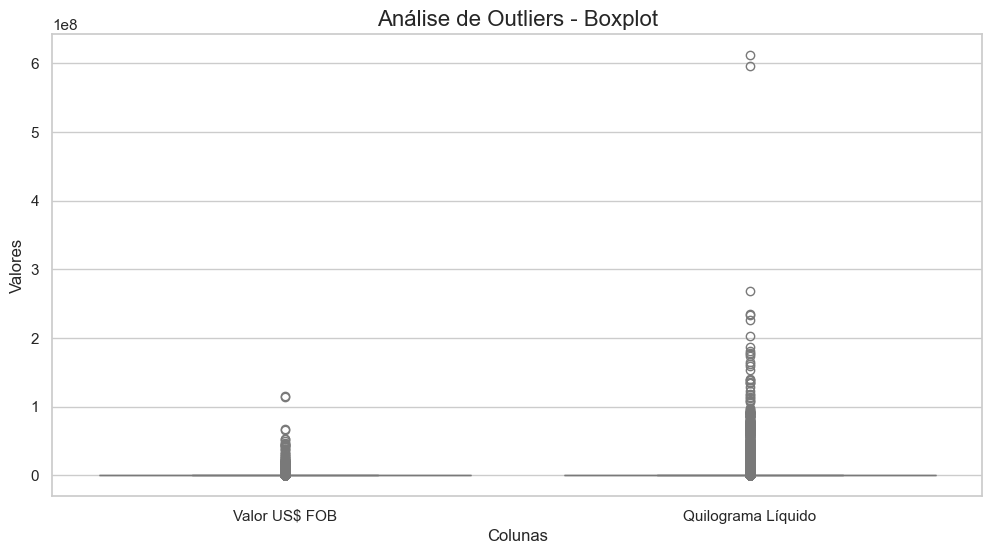

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Escolher as duas colunas que você deseja analisar
colunas_selecionadas = ['Valor US$ FOB', 'Quilograma Líquido']

# Criação de uma nova base de dados sem outliers
dataset_sem_outliers = dataset_exportacoes_rn_continente.copy()

# Calcular quartis e outliers para as colunas selecionadas
for coluna in colunas_selecionadas:
    print(f"\nAnálise de {coluna}:")

    # Calcular os quartis e a mediana
    Q1 = dataset_exportacoes_rn_continente[coluna].quantile(0.25)
    Q3 = dataset_exportacoes_rn_continente[coluna].quantile(0.75)
    Q2 = dataset_exportacoes_rn_continente[coluna].median()

    # Calcular o IQR (Intervalo Interquartílico)
    IQR = Q3 - Q1

    # Definir limites para os outliers
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    # Identificar os outliers
    outliers = dataset_exportacoes_rn_continente[(dataset_exportacoes_rn_continente[coluna] < limite_inferior) |
                                                 (dataset_exportacoes_rn_continente[coluna] > limite_superior)]

    # Exibir as estatísticas
    print(f"Q1 (25%): {Q1}")
    print(f"Q2 (Mediana): {Q2}")
    print(f"Q3 (75%): {Q3}")
    print(f"IQR: {IQR}")
    print(f"Limite Inferior para Outliers: {limite_inferior}")
    print(f"Limite Superior para Outliers: {limite_superior}")
    print(f"Quantidade de Outliers detectados em {coluna}: {len(outliers)}")

    # Remover os outliers da nova base de dados
    dataset_sem_outliers = dataset_sem_outliers[(dataset_sem_outliers[coluna] >= limite_inferior) &
                                                (dataset_sem_outliers[coluna] <= limite_superior)]

# Exibir a descrição das colunas selecionadas
print("\nDescrição das colunas analisadas:")
print(dataset_exportacoes_rn_continente[colunas_selecionadas].describe())

# Exibir a descrição do dataset sem outliers
print("\nDescrição das colunas no dataset sem outliers:")
print(dataset_sem_outliers[colunas_selecionadas].describe())

# Configuração do gráfico
plt.figure(figsize=(12, 6))
sns.set(style="whitegrid")

# Criar o boxplot para as duas colunas selecionadas
sns.boxplot(data=dataset_exportacoes_rn_continente[colunas_selecionadas], palette="coolwarm")

# Título e rótulos
plt.title("Análise de Outliers - Boxplot", fontsize=16)
plt.xlabel("Colunas", fontsize=12)
plt.ylabel("Valores", fontsize=12)

# Exibir o gráfico
plt.show()



# Removendo outliers e criando duas bases
> Base 1 continua com outliers
>
> Base 2 sem outliers 

In [3]:
dataset_sem_outliers

,Unnamed: 0,Bloco Econômico,Países,Código NCM,Descrição NCM,Código SH6,Descrição SH6,Código SH4,Descrição SH4,Código SH2,Descrição SH2,Código Seção,Descrição Seção,Unidade estatística,Valor US$ FOB,Quilograma Líquido,Quantidade Estatística,Data
0,0,0,8,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,5,18,2,14906,11675,15,2024-09-01
1,1,0,37,52093900,Outros tecidos de algodão que contenham pelo m...,520939,"Outros tecidos de algodão tinto, contendo => 8...",237,510,46,2,10,6,8,11130,1294,1294,2024-09-01
2,2,0,37,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,3,16,8,38824,22782,22782,2024-09-01
3,3,0,46,27101911,Querosenes de aviação,271019,Outros óleos de petróleo ou de minerais betumi...,119,558,25,18,5,18,2,1915,1482,2,2024-09-01
4,4,0,46,52092200,Tecidos de algodão que contenham pelo menos 85...,520922,"Tecido de algodão branqueado, em ponto sarjado...",237,510,46,2,10,6,8,58126,9825,9825,2024-09-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57130,57130,6,161,17041000,"Gomas de mascar, mesmo revestidas de açúcar, s...",170410,"Gomas de mascar, sem cacau, mesmo revestidas d...",66,452,16,6,3,16,8,9696,4640,0,1997-01-01
57131,57131,6,161,17049020,"Caramelos, confeitos, dropes, pastilhas, e pro...",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,3,16,8,40640,30275,0,1997-01-01
57132,57132,6,161,17049090,"Outros produtos de confeitaria, sem cacau",170490,"Outros produtos de confeitaria, sem cacau",66,452,16,6,3,16,8,34060,26720,0,1997-01-01
57133,57133,7,75,15211000,Ceras vegetais,152110,"Ceras vegetais, mesmo refinadas ou coradas (ex...",61,111,14,28,2,2,8,45276,14000,14,1997-01-01


# Exportando bases de dados da etapa 2

In [4]:
dataset_exportacoes_rn_continente.to_csv("../../../data/interim/preprocessing/02_dataset_expo_rn_OUTLIERS.csv")
dataset_sem_outliers.to_csv("../../../data/interim/preprocessing/02_dataset_expo_rn_NO_OUTLIERS.csv")
